# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea']

categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

target = ['SalePrice']

## Continuous Features

In [2]:
# Log transform and normalize
ames_cont = ames[continuous]
ames_log = np.log(ames_cont)

log_names = [f'{column}_log' for column in ames_cont.columns]
# ames_log.columns = log_names

In [3]:
log_names

['LotArea_log', '1stFlrSF_log', 'GrLivArea_log']

In [4]:
# Standardization
# def normalize(feature):
#     return (feature - feature.mean()) / feature.std()

# ames_log_norm = ames_log.apply(normalize)

In [5]:
# normalize (subract mean and divide by std)
# but let's use sklearn plz

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ames_log_norm = scaler.fit_transform(ames_log)

In [6]:
# Making into a df again...
ames_log_norm = pd.DataFrame(ames_log_norm, columns = log_names)

## Categorical Features

In [7]:
# One hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)

## Combine Categorical and Continuous Features

In [8]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)
preprocessed.head()

LotArea_log  1stFlrSF_log  GrLivArea_log  BldgType_2fmCon  BldgType_Duplex  \
0    -0.133231     -0.803570       0.529260                0                0   
1     0.113442      0.418585      -0.381846                0                0   
2     0.420061     -0.576560       0.659675                0                0   
3     0.103347     -0.439287       0.541511                0                0   
4     0.878409      0.112267       1.282191                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  KitchenQual_Fa  KitchenQual_Gd  \
0               0                0               0               1   
1               0                0               0               0   
2               0                0               0               1   
3               0                0               0               1   
4               0                0               0               1   

   KitchenQual_TA  ...  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0               0  ...                     0                     0   
1               1  ...                     0                     0   
2               0  ...                     0                     0   
3               0  ...                     0                     0   
4               0  ...                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  
0                    0                     0  
1                    0                     1  
2                    0                     0  
3                    0                     0  
4                    0                     0  

[5 rows x 47 columns]

## Run a linear model with SalePrice as the target variable in statsmodels

In [9]:
import statsmodels.api as sm

In [10]:
X = preprocessed
y = np.log(ames[target]) # logging target

In [11]:
# Your code here
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 06 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:30:47   Log-Likelihood:                 601.65
No. Observations:                1460   AIC:                            -1107.
Df Residuals:                    1412   BIC:                            -853.6
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.9714      0.105    113.842      0.000      11.765      12.178
LotArea_log              0.0412      0.008      5.475      0.000       0.026       0.056
1stFlrSF_log             0.0548      0.006      8.584      0.000       0.042       0.067
GrLivArea_log            0.1505      0.006     24.114      0.000       0.138       0.163
BldgType_2fmCon         -0.0685      0.032     -2.173      0.030      -0.130      -0.007
BldgType_Duplex         -0.1679      0.025     -6.813      0.000      -0.216      -0.120
BldgType_Twnhs          -0.0561      0.037     -1.513      0.130      -0.129       0.017
BldgType_TwnhsE         -0.0205      0.024     -0.858      0.391      -0.067       0.026
KitchenQual_Fa          -0.3994      0.035    -11.315      0.000      -0.469      -0.330
KitchenQual_Gd          -0.1526      0.020     -7.613      0.000      -0.192      -0.113
KitchenQual_TA          -0.2673      0.022    -12.111      0.000      -0.311      -0.224
SaleType_CWD             0.0913      0.086      1.061      0.289      -0.077       0.260
SaleType_Con             0.2341      0.121      1.927      0.054      -0.004       0.472
SaleType_ConLD           0.1259      0.062      2.029      0.043       0.004       0.248
SaleType_ConLI           0.0132      0.078      0.169      0.865      -0.140       0.166
SaleType_ConLw           0.0064      0.078      0.082      0.935      -0.147       0.160
SaleType_New             0.1198      0.031      3.803      0.000       0.058       0.182
SaleType_Oth             0.0471      0.098      0.480      0.631      -0.145       0.239
SaleType_WD              0.0698      0.026      2.676      0.008       0.019       0.121
MSZoning_FV              0.4261      0.077      5.526      0.000       0.275       0.577
MSZoning_RH              0.3502      0.078      4.512      0.000       0.198       0.503
MSZoning_RL              0.3979      0.065      6.151      0.000       0.271       0.525
MSZoning_RM              0.4403      0.061      7.264      0.000       0.321       0.559
Street_Pave             -0.0851      0.072     -1.182      0.237      -0.226       0.056
Neighborhood_Blueste     0.0211      0.127      0.167      0.868      -0.228       0.270
Neighborhood_BrDale     -0.1848      0.068     -2.711      0.007      -0.319      -0.051
Neighborhood_BrkSide    -0.2596      0.055     -4.735      0.000      -0.367      -0.152
Neighborhood_ClearCr    -0.0840      0.058     -1.456      0.146      -0.197       0.029
Neighborhood_CollgCr    -0.0304      0.047     -0.641      0.522      -0.123       0.063
Neighborhood_Crawfor    -0.0329      0.052     -0.638      0.523      -0.134       0.068
Neighborhood_Edwards    -0.3041      0.050     -6.143      0.000      -0.401      -0.207
Neighborhood_Gilbert    -0.0391      0.050     -0.777    

## Run the same model in scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [13]:
y_pred = linreg.predict(X)

In [14]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
linreg.coef_

array([[ 0.04123803,  0.05475763,  0.15047043, -0.06849094, -0.16790514,
        -0.05605952, -0.02045271, -0.39939595, -0.15259939, -0.2673328 ,
         0.09126571,  0.23411019,  0.12586955,  0.0132195 ,  0.00642584,
         0.11977699,  0.04707234,  0.06982549,  0.42606959,  0.35024342,
         0.39789053,  0.4403098 , -0.08512761,  0.02114409, -0.18483139,
        -0.25957286, -0.08396174, -0.0303953 , -0.0328894 , -0.30408946,
        -0.03914605, -0.3842061 , -0.27635109, -0.10198873, -0.17602786,
        -0.00637144, -0.10690515,  0.14505362,  0.14483992, -0.37350736,
        -0.27952174, -0.18991196, -0.09311116,  0.03795979,  0.17159285,
         0.00227384,  0.0509805 ]])

In [15]:
linreg.intercept_

array([11.97144414])

In [16]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.8389500211207063

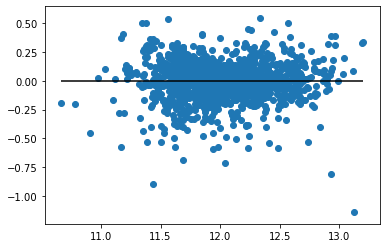

In [17]:
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, y_pred.min(), y_pred.max())

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [18]:
# getting the used column names for the df
used_cols = [*continuous, *categoricals]
used_cols

['LotArea',
 '1stFlrSF',
 'GrLivArea',
 'BldgType',
 'KitchenQual',
 'SaleType',
 'MSZoning',
 'Street',
 'Neighborhood']

In [19]:
# creating an empty dataframe for the new row
new_row = pd.DataFrame(columns=used_cols)

In [20]:
# adding the details provided into the empty dataframe
new_row = new_row.append({"LotArea": 14977,
                          '1stFlrSF': 1976,
                          'GrLivArea': 1976,
                          'BldgType': '1Fam',
                          'KitchenQual': 'Gd',
                          'SaleType': 'New',
                          'MSZoning': 'RL',
                          'Street': 'Pave',
                          'Neighborhood': 'NridgHt'},
                          ignore_index=True)

In [21]:
new_row

LotArea 1stFlrSF GrLivArea BldgType KitchenQual SaleType MSZoning Street  \
0   14977     1976      1976     1Fam          Gd      New       RL   Pave   

  Neighborhood  
0      NridgHt

In [22]:
# first we'll tackle the continuous columns
new_row_cont = new_row[continuous]

In [23]:
# log features
new_row_log = np.log(new_row_cont.astype(float)) # won't work unless float

log_names = [f'{column}_log' for column in new_row_cont.columns]
# new_row_log.columns = log_names

# normalizing... can just use our scaler

new_row_log = scaler.transform(new_row_log)

In [24]:
new_row_log

array([[0.97324786, 1.83025654, 0.96286942]])

In [25]:
# putting the results in a dataframe
new_row_log_norm = pd.DataFrame(columns=log_names)
new_row_log_norm = new_row_log_norm.append(dict(zip(log_names, new_row_log[0])), ignore_index=True)
new_row_log_norm

LotArea_log  1stFlrSF_log  GrLivArea_log
0     0.973248      1.830257       0.962869

In [26]:
# now time for the categoricals
new_row_cat = new_row[categoricals]

In [27]:
new_row_ohe = pd.DataFrame(columns = ames_ohe.columns)

In [28]:
# using complicated for loops to ohe the new row
ohe_dict = {}
for col_type in new_row_cat.columns:
    col_list = [c for c in new_row_ohe.columns.to_list() if col_type in c]
    for x in col_list:
        if new_row_cat[col_type][0] in x:
            ohe_dict[x] = 1
        else:
            ohe_dict[x] = 0

In [29]:
# putting the results in a dataframe

new_row_ohe = new_row_ohe.append(ohe_dict, ignore_index=True)
new_row_ohe

BldgType_2fmCon BldgType_Duplex BldgType_Twnhs BldgType_TwnhsE  \
0               0               0              0               0   

  KitchenQual_Fa KitchenQual_Gd KitchenQual_TA SaleType_CWD SaleType_Con  \
0              0              1              0            0            0   

  SaleType_ConLD  ... Neighborhood_NoRidge Neighborhood_NridgHt  \
0              0  ...                    0                    1   

  Neighborhood_OldTown Neighborhood_SWISU Neighborhood_Sawyer  \
0                    0                  0                   0   

  Neighborhood_SawyerW Neighborhood_Somerst Neighborhood_StoneBr  \
0                    0                    0                    0   

  Neighborhood_Timber Neighborhood_Veenker  
0                   0                    0  

[1 rows x 44 columns]

In [30]:
# putting together this row's data - both continuous and categorical
new_row_processed = pd.concat([new_row_log_norm, new_row_ohe], axis=1)
new_row_processed

LotArea_log  1stFlrSF_log  GrLivArea_log BldgType_2fmCon BldgType_Duplex  \
0     0.973248      1.830257       0.962869               0               0   

  BldgType_Twnhs BldgType_TwnhsE KitchenQual_Fa KitchenQual_Gd KitchenQual_TA  \
0              0               0              0              1              0   

   ... Neighborhood_NoRidge Neighborhood_NridgHt Neighborhood_OldTown  \
0  ...                    0                    1                    0   

  Neighborhood_SWISU Neighborhood_Sawyer Neighborhood_SawyerW  \
0                  0                   0                    0   

  Neighborhood_Somerst Neighborhood_StoneBr Neighborhood_Timber  \
0                    0                    0                   0   

  Neighborhood_Veenker  
0                    0  

[1 rows x 47 columns]

In [31]:
# now - FINALLY - we can model

new_row_pred_log = linreg.predict(new_row_processed)

np.exp(new_row_pred_log)

array([[321728.49636656]])

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!